### `plot_DUNEX_met_station`
Plot some of the DUNEX met data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# define some colors using palettes from ColorBrewer https://colorbrewer2.org/
grays = ['#f7f7f7','#cccccc','#969696','#636363','#252525']
blues = ['#eff3ff','#bdd7e7','#6baed6','#3182bd','#08519c']
windcol = ['#edf8fb','#b3cde3','#8c96c6','#8856a7','#810f7c']

# path to data
pathn = r'C:\\crs\\proj\\2019_DUNEX\\Pea_Island_Data\\06_metstation\\'
fn = 'Dunex_2021-09-13.csv'

# filename for output figure
figfn = 'DUNEX_met_station_plot.png'

# "Variable Name:","sequenceNumber","batteryVoltage","temperatureDatalogger","signalPercent","direction","direction","speed","speed","speed","airTemperature","relativeHumidity","rainfall"
# "Result Unit:","Dimensionless","volt","degreeCelsius","percent","degrees","degrees","metersPerSecond","metersPerSecond","metersPerSecond","degreeCelsius","percent","mm"

#### Read the `.csv` file using Pandas
Replace -9999 with NaNs, and and create a column with datetime objects

In [2]:
df = pd.read_csv(pathn+fn,skiprows=0,header=7,sep=',',na_values=[-9999])
df['dt'] = pd.to_datetime(df['Date and Time in UTC'], format='%Y-%m-%d %H:%M:%S')
df

,Date and Time in UTC,SampNum,Battery,BoardTemp,signalPercent,WXTDm,WXTDx,WXTSn,WXTSm,WXTSx,WXTTa,WXTUa,WXTRc,dt
0,2021-09-13 14:04:00,2.0,4.927,30.50,NaN,270.0,293.0,3.5,6.2,8.4,25.4,64.9,0.00,2021-09-13 14:04:00
1,2021-09-13 14:05:00,2.0,4.912,30.50,NaN,268.0,288.0,3.5,5.9,7.9,25.4,65.7,0.00,2021-09-13 14:05:00
2,2021-09-13 14:06:00,3.0,4.897,30.50,NaN,271.0,296.0,2.1,6.0,8.7,25.4,64.3,0.00,2021-09-13 14:06:00
3,2021-09-13 14:07:00,4.0,4.897,30.50,NaN,275.0,304.0,1.6,5.7,8.1,25.4,65.5,0.00,2021-09-13 14:07:00
4,2021-09-13 14:08:00,5.0,4.897,30.75,NaN,275.0,298.0,2.7,5.7,7.7,25.4,66.5,0.00,2021-09-13 14:08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59383,2021-10-24 19:47:00,-6152.0,3.669,31.75,NaN,130.0,144.0,3.0,3.7,4.2,21.7,61.5,93.95,2021-10-24 19:47:00
59384,2021-10-24 19:48:00,-6151.0,3.669,31.75,NaN,128.0,143.0,3.0,3.6,4.1,21.7,62.0,93.95,2021-10-24 19:48:00
59385,2021-10-24 19:49:00,-6150.0,3.669,31.50,NaN,135.0,144.0,3.2,3.7,4.0,21.7,59.2,93.95,2021-10-24 19:49:00
59386,2021-10-24 19:50:00,-6149.0,3.669,31.50,NaN,135.0,149.0,2.3,3.4,4.1,21.7,59.8,93.95,2021-10-24 19:50:00


#### Magnetic declination  
from https://www.ngdc.noaa.gov/geomag/calculators/magcalc.shtml#declination  
for 35.677$^{\circ}$N, 75.480$^{\circ}$W on 9/30/2021:    
11.04$^{\circ}$West, changing by 0.01$^{\circ}$West per year  
$0.^{\circ}M = -11.04^{\circ}T$, so:  
$T = M + rot$ where $rot = -11.04$

In [3]:
rot = -11.04

#### Put the data into arrays and correct for mag. declination

In [4]:
dt = df['dt'].values
temp = df['WXTTa'].values
wspd_min = df['WXTSn'].values
wspd_mean = df['WXTSm'].values
wspd_max = df['WXTSx'].values

# correct for magnetic declination
wdir = df['WXTDm'].values + rot
wdir[wdir<0.]=wdir[wdir<0.]+360.

airT = df['WXTTa'].values
relh = df['WXTUa'].values
pptn = df['WXTRc'].values

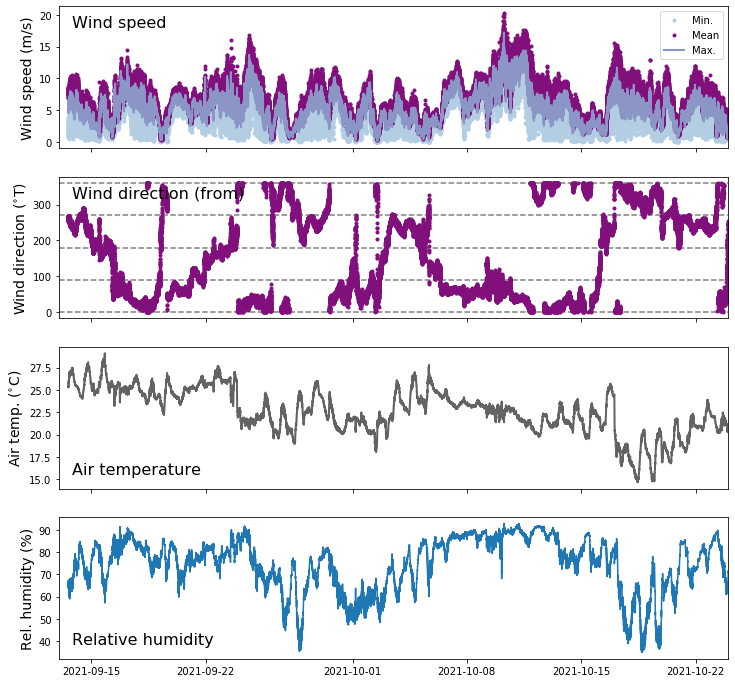

In [5]:
dstart = datetime.date(2021, 9, 13)
dend = datetime.date(2021, 10, 24)

fig, ax = plt.subplots(nrows=4, ncols=1, sharey=False, sharex=True, squeeze=True, figsize = (12,12))
ax[0].plot(dt,wspd_min, '.',c=windcol[1],zorder=0,label='Min.')
ax[0].plot(dt,wspd_max, '.',c=windcol[4],zorder=1,label='Mean')
ax[0].plot(dt,wspd_mean,'-',linewidth=2,c=windcol[2],zorder=2,label='Max.')
ax[0].set_xlim([dstart, dend])
ax[0].set_ylabel('Wind speed (m/s)',fontsize=14)
ax[0].text(.02,.85,'Wind speed',fontsize=16,transform=ax[0].transAxes)
ax[0].legend()
ax[0].set_xticklabels([])

ax[1].plot([dstart,dend],[0., 0.],'--',c='gray',zorder=0)
ax[1].plot([dstart,dend],[90., 90.],'--',c='gray',zorder=0)
ax[1].plot([dstart,dend],[180., 180.],'--',c='gray',zorder=0)
ax[1].plot([dstart,dend],[270., 270.],'--',c='gray',zorder=0)
ax[1].plot([dstart,dend],[360., 360.],'--',c='gray',zorder=0)

ax[1].plot(dt,wdir,'.',linewidth=2,c=windcol[4],zorder=1)
ax[1].set_ylabel('Wind direction ($^{\circ}$T)',fontsize=14)
ax[1].text(.02,.85,'Wind direction (from)',fontsize=16,transform=ax[1].transAxes)

ax[2].plot(dt,airT,'-',c=grays[3],linewidth=2)
ax[2].set_ylabel('Air temp. ($^{\circ}$C)',fontsize=14)
ax[2].text(.02,.1,'Air temperature',fontsize=16,transform=ax[2].transAxes)

ax[3].plot(dt,relh)
ax[3].set_ylabel('Rel. humidity (%)',fontsize=14)
ax[3].text(.02,.1,'Relative humidity',fontsize=16,transform=ax[3].transAxes)

plt.savefig(pathn+figfn)